# **Análisis de Datos Financieros y Diseño de Indicadores – Examen 1**

**Instrucciones:**
- Este examen utiliza el método del caso para evaluar tu capacidad de analizar datos, comprender quiénes son los clientes de Gabu, y predecir el valor del tiempo de vida (LTV) de los mismos.
- En cada pregunta, explica claramente tu razonamiento y muestra todos los cálculos necesarios.
- Puedes utilizar Python (Pandas, Matplotlib, Seaborn, statsmodels) para los cálculos y visualizaciones.
- Sé conciso y directo en tus explicaciones.

---

## **Estudio de Caso: Gabu**

Gabu es una startup que supervisa las sesiones de juego de los niños mientras juegan en línea, proporcionando informes detallados a los padres sobre el tiempo de juego y el tipo de contenido con el que interactúan sus hijos. La empresa busca entender mejor a sus clientes y, sobre todo, predecir el valor de tiempo de vida de cada cliente (LTV) para optimizar sus estrategias de retención y adquisición.

La empresa ha recopilado datos por cliente que incluyen características demográficas y económicas como:

- **ID del Cliente**: Identificador único del cliente.
- **Edad del Niño**: Edad del niño para el que se supervisa el juego.
- **Sexo del Niño**: Hombre o mujer.
- **Nivel de Estudios del Padre**: El nivel de estudios del padre que registro al niño.
- **Duración de la Subscripción**: Tiempo en meses que el cliente ha estado suscrito al servicio.
- **Plan de Subscripción**: El tipo de plan (Básico, Premium, Familiar).
- **Ingresos del Hogar**: Ingresos anuales del hogar del cliente (USD).
- **Gasto Total en Subscripción**: Gasto acumulado del cliente en el servicio.
- **Número de Sesiones por Semana**: Número promedio de sesiones de juego supervisadas por semana.
- **Nivel de Satisfacción del Cliente**: Puntuación de satisfacción del cliente (1 a 5).
- **Churn**: Variable binaria que indica si el cliente ha cancelado el servicio (1 = canceló, 0 = activo).
- **Valor del Tiempo de Vida (LTV)**: Valor total proyectado que Gabu espera obtener de un cliente a lo largo de su relación.

---

## **Sección 1: Comprendiendo a los Clientes** (20 puntos)

**Pregunta 1: Exploración de los Datos de los Clientes**  
Con base en los datos proporcionados:
1. Segmenta a los clientes en función de sus características demográficas. 
2. Analiza las características demográficas y económicas de los segmentos. Explica cómo estos segmentos podrían ayudar a Gabu a diseñar estrategias más efectivas de marketing o producto.


# Sección 1

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(working_memory=1024)

In [2]:
df = pd.read_csv('gabu_data.csv')
df.head()

,ID del Cliente,Edad del Niño,Sexo del Niño,Nivel de Estudios del Padre,Duración de la Subscripción (meses),Plan de Subscripción,Ingresos del Hogar (USD),Gasto Total en Subscripción (USD),Número de Sesiones por Semana,Nivel de Satisfacción del Cliente,Churn,Valor del Tiempo de Vida (LTV)
0,1,10,Masculino,Undergraduate,22.0,Básico,60983.52,154.0,1.00,3.25,1,1121.03
1,2,7,Femenino,Undergraduate,26.0,Premium,46799.12,520.0,4.43,4.61,0,1206.53
2,3,16,Femenino,Undergraduate,11.0,Básico,59820.15,77.0,3.15,2.88,1,810.93
3,4,14,Masculino,Undergraduate,21.0,Premium,42901.02,420.0,5.85,5.00,0,1329.80
4,5,11,Masculino,Undergraduate,24.0,Premium,85253.09,480.0,3.73,4.11,0,1861.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID del Cliente                       1518 non-null   int64  
 1   Edad del Niño                        1518 non-null   int64  
 2   Sexo del Niño                        1518 non-null   object 
 3   Nivel de Estudios del Padre          1518 non-null   object 
 4   Duración de la Subscripción (meses)  1518 non-null   float64
 5   Plan de Subscripción                 1518 non-null   object 
 6   Ingresos del Hogar (USD)             1518 non-null   float64
 7   Gasto Total en Subscripción (USD)    1518 non-null   float64
 8   Número de Sesiones por Semana        1518 non-null   float64
 9   Nivel de Satisfacción del Cliente    1518 non-null   float64
 10  Churn                                1518 non-null   int64  
 11  Valor del Tiempo de Vida (LTV)

In [5]:
numerical_features = ['Edad del Niño', 'Ingresos del Hogar (USD)']
categorical_features = ['Sexo del Niño', 'Nivel de Estudios del Padre']

encoded_features = pd.get_dummies(df[categorical_features],
                   columns=categorical_features, 
                   drop_first=True)

data_to_model_standarized = StandardScaler().fit_transform(df[numerical_features])

data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

encoded_features_df = encoded_features.reset_index()

data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
data_to_model = data_to_model.drop('index', axis=1)

data_to_model.head()

,Edad del Niño,Ingresos del Hogar (USD),Sexo del Niño_Masculino,Nivel de Estudios del Padre_High School,Nivel de Estudios del Padre_Undergraduate
0,-0.103677,0.755915,True,False,True
1,-0.837964,-0.221592,False,False,True
2,1.364896,0.675743,False,False,True
3,0.875371,-0.490227,True,False,True
4,0.141085,2.428435,True,False,True


C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

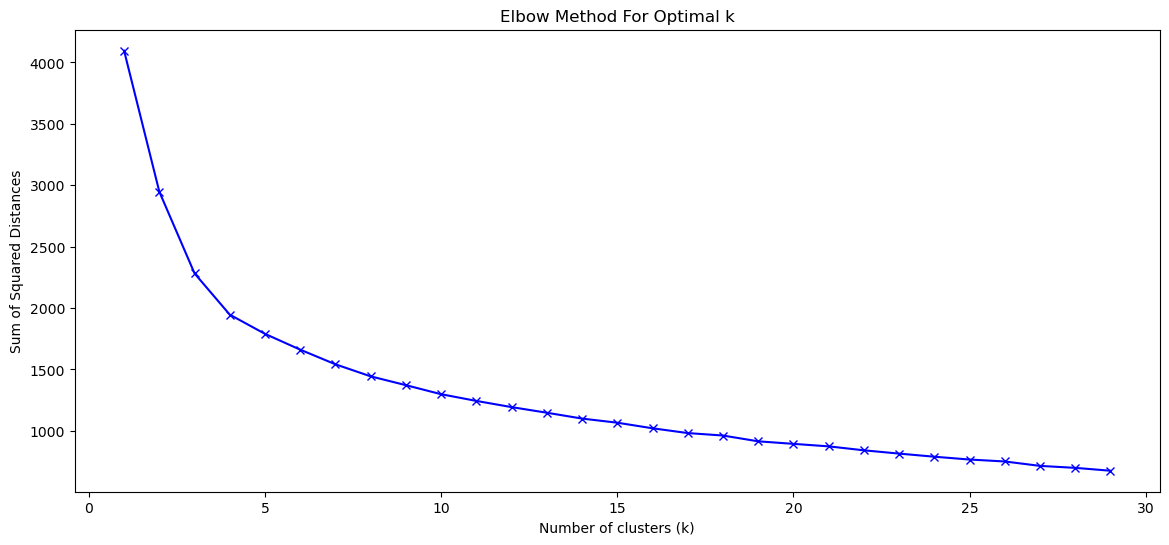

In [7]:
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k, random_state=15)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(14, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Número de clústeres a utilizar

Gracias a la gráfica de codo, se decide utilizar 4 clusters, porque a partir del cluster 4 en adelante, deja de ser tan significante el cambio.

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_to_model)
labels

C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([2, 0, 1, ..., 0, 0, 3])

In [9]:
df['cluster'] = labels
df.head()

,ID del Cliente,Edad del Niño,Sexo del Niño,Nivel de Estudios del Padre,Duración de la Subscripción (meses),Plan de Subscripción,Ingresos del Hogar (USD),Gasto Total en Subscripción (USD),Número de Sesiones por Semana,Nivel de Satisfacción del Cliente,Churn,Valor del Tiempo de Vida (LTV),cluster
0,1,10,Masculino,Undergraduate,22.0,Básico,60983.52,154.0,1.00,3.25,1,1121.03,2
1,2,7,Femenino,Undergraduate,26.0,Premium,46799.12,520.0,4.43,4.61,0,1206.53,0
2,3,16,Femenino,Undergraduate,11.0,Básico,59820.15,77.0,3.15,2.88,1,810.93,1
3,4,14,Masculino,Undergraduate,21.0,Premium,42901.02,420.0,5.85,5.00,0,1329.80,3
4,5,11,Masculino,Undergraduate,24.0,Premium,85253.09,480.0,3.73,4.11,0,1861.25,2


In [11]:
def boxplot_clusters(col):
    sns.boxplot(x='cluster', y=col, data=df, hue='cluster')
    plt.show()

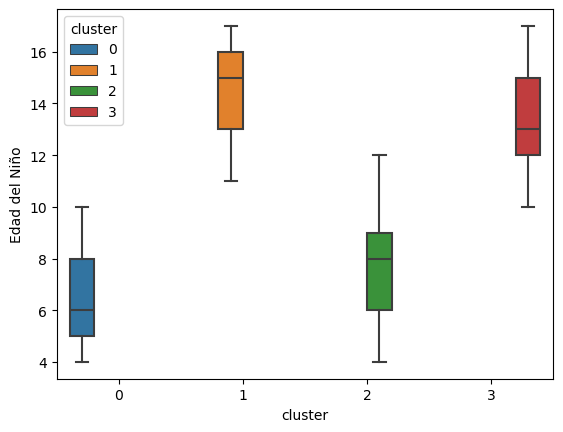

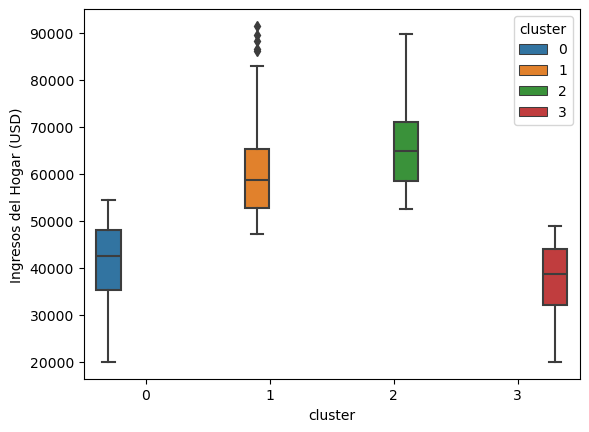

In [12]:
for i in range(len(numerical_features)):
    boxplot_clusters(numerical_features[i])

In [32]:
def barplot_clusters(col):
    sns.countplot(x=col, hue='cluster', data=df)
    plt.title('Count of Nivel de Estudios del Padre')
    plt.legend(loc='best')
    plt.xlabel('Nivel de Estudios del Padre')
    plt.ylabel('Count')
    plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

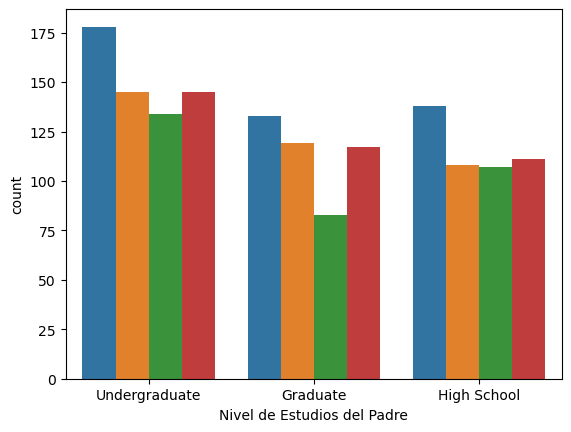

In [33]:
barplot_clusters('Nivel de Estudios del Padre')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

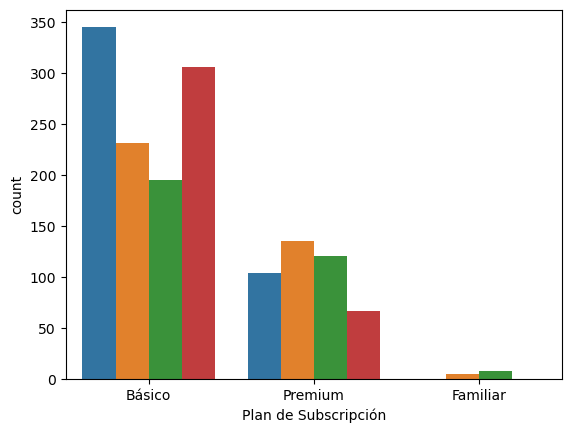

In [35]:
barplot_clusters('Plan de Subscripción')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

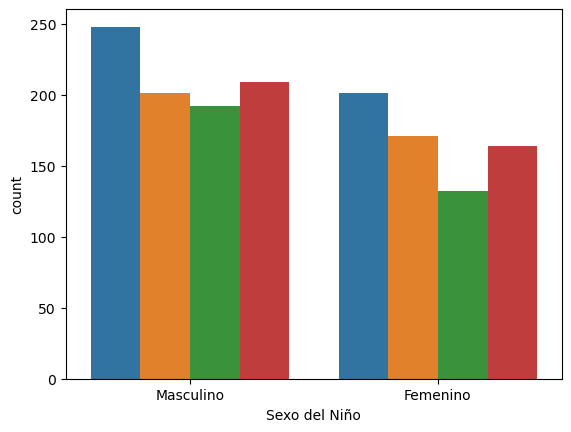

In [36]:
barplot_clusters('Sexo del Niño')

### Definición de los clusters

- **Cluster 1:** Niño de pequeña edad e ingresos familiares bajos.
- **Cluster 2:** Niño de alta edad ingresos familiares altos.
- **Cluster 3:** Niño de pequeña edad e ingresos familiares altos.
- **Cluster 4:** Niño de alta edad e ingresos familiares bajos.

---

## **Sección 2: Selección y Cálculo de KPIs** (20 puntos)

**Pregunta 2: Selección del KPI Correcto**  
Gabu quiere identificar un KPI clave que les permita medir la retención de clientes y la capacidad de generar ingresos a largo plazo.

A continuación, se te presentan cuatro KPIs posibles. Solo uno de estos es el KPI correcto que Gabu debería usar para medir la retención de clientes y su impacto en los ingresos futuros. Selecciona el KPI correcto, calcúlalo usando los datos proporcionados, y justifica por qué es el más adecuado.

### Opciones de KPI:

### **Opción 1: Tasa de Sesiones por Cliente**
   - *Definición*: Número promedio de sesiones supervisadas por cliente.
   - *Fórmula*: $
     \text{Tasa de Sesiones por Cliente} = \frac{\text{Número de Sesiones por Semana}}{\text{Clientes Existentes}}$

### **Opción 2: Tasa de Retorno de Inversión en Marketing (ROI de Marketing)**
   - *Definición*: Mide el retorno generado por los gastos de marketing en relación con los ingresos obtenidos.
   - *Fórmula*: $\text{ROI de Marketing} = \frac{\text{Ingresos Totales} - \text{Gastos de Marketing}}{\text{Gastos de Marketing}}$

### **Opción 3: Tasa de Crecimiento de Nuevos Clientes**
   - *Definición*: El porcentaje de aumento o disminución en la cantidad de nuevos clientes adquiridos.
   - *Fórmula*: $\text{Tasa de Crecimiento de Nuevos Clientes} = \frac{\text{Nuevos Clientes}_{\text{mes actual}} - \text{Nuevos Clientes}_{\text{mes anterior}}}{\text{Nuevos Clientes}_{\text{mes anterior}}}$

### **Opción 4: Tasa de Churn**
   - *Definición*: El porcentaje de clientes que cancelan el servicio durante un período de tiempo determinado.
   - *Fórmula*: $\text{Tasa de Churn} = \frac{\text{Número de Clientes que Cancelaron}}{\text{Número Total de Clientes Activos al Inicio del Periodo}}$

### Instrucciones:
1. Selecciona el KPI correcto que mejor mida la retención de clientes.
2. Explica por qué este KPI es el más adecuado para Gabu y cómo ayudará a medir



### Sección 2

Elegiría la Tasa de churn, porque Gabu está interesado en medir la retención de clientes y la capacidad de generar ingresos a largo plazo. Así que con esto pueden saber cuantos clientes retienen y así pensar cuantos clientes les están dando valor en el corto y largo plazo

---

## **Sección 3: Predicción del Valor del Tiempo de Vida (LTV)** (40 puntos)

**Pregunta 3: Construcción de un Modelo de Regresión para Predecir LTV**  
El equipo de Gabu desea predecir el valor del tiempo de vida (LTV) de sus clientes usando las características demográficas y económicas del dataset.

1. **Preparación de los Datos**:  
   - Usa las siguientes variables como independientes:  
     - **Edad del Niño**  
     - **Ingresos del Hogar**  
     - **Plan de Subscripción**  
     - **Número de Sesiones por Semana**  
     - **Nivel de Satisfacción del Cliente**
     - **Segmento del cliente**
   - Usa el **Valor del Tiempo de Vida (LTV)** como la variable dependiente.

2. **Construcción del Modelo**:  
   - Ajusta un modelo de regresión lineal utilizando las variables mencionadas.
   - Escribe la ecuación de la regresión (incluye los coeficientes de cada variable).

3. **Interpretación de los Coeficientes**:  
   - Explica el significado de los coeficientes obtenidos en el modelo. ¿Cómo afecta cada variable independiente al LTV?  
   - Identifica los factores que parecen tener el mayor impacto en el valor de tiempo de vida y discute por qué podrían ser importantes para Gabu.


### Sección 3

#### Parte 1: Preparación de datos

In [52]:
df2 = pd.read_csv('gabu_data.csv')

new_numerical_features = ['Edad del Niño', 'Duración de la Subscripción (meses)', 'Ingresos del Hogar (USD)', 
                          'Gasto Total en Subscripción (USD)', 'Número de Sesiones por Semana', 
                         'Nivel de Satisfacción del Cliente', 'Churn', 'Valor del Tiempo de Vida (LTV)']
new_categorical_features = ['Sexo del Niño', 'Nivel de Estudios del Padre', 'Plan de Subscripción']

In [56]:
data_encoded_with_id = pd.get_dummies(df2[['ID del Cliente'] + new_categorical_features],
                             columns=new_categorical_features,
                             drop_first=False)

df_dummies = df2[['ID del Cliente'] + new_numerical_features].merge(data_encoded_with_id, on='ID del Cliente')
df_dummies = df2[['ID del Cliente'] + new_numerical_features].merge(data_encoded_with_id, on='ID del Cliente')

# Convertir los booleanos a 0 y 1
df_to_model = df_dummies.astype({col: 'int' for col in df_dummies.select_dtypes('bool').columns})
df_to_model['cluster'] = labels

df_to_model.head()

,ID del Cliente,Edad del Niño,Duración de la Subscripción (meses),Ingresos del Hogar (USD),Gasto Total en Subscripción (USD),Número de Sesiones por Semana,Nivel de Satisfacción del Cliente,Churn,Valor del Tiempo de Vida (LTV),Sexo del Niño_Femenino,Sexo del Niño_Masculino,Nivel de Estudios del Padre_Graduate,Nivel de Estudios del Padre_High School,Nivel de Estudios del Padre_Undergraduate,Plan de Subscripción_Básico,Plan de Subscripción_Familiar,Plan de Subscripción_Premium,cluster
0,1,10,22.0,60983.52,154.0,1.00,3.25,1,1121.03,0,1,0,0,1,1,0,0,2
1,2,7,26.0,46799.12,520.0,4.43,4.61,0,1206.53,1,0,0,0,1,0,0,1,0
2,3,16,11.0,59820.15,77.0,3.15,2.88,1,810.93,1,0,0,0,1,1,0,0,1
3,4,14,21.0,42901.02,420.0,5.85,5.00,0,1329.80,0,1,0,0,1,0,0,1,3
4,5,11,24.0,85253.09,480.0,3.73,4.11,0,1861.25,0,1,0,0,1,0,0,1,2


#### Parte 2: Construcción del Modelo

In [58]:
import statsmodels.api as sm

In [63]:
x = ['Edad del Niño', 'Ingresos del Hogar (USD)', 'Número de Sesiones por Semana', 'Nivel de Satisfacción del Cliente',
     'Plan de Subscripción_Básico', 'Plan de Subscripción_Familiar', 'Plan de Subscripción_Premium', 'cluster']

y = ['Valor del Tiempo de Vida (LTV)']

X=sm.add_constant(df_to_model[x])

model=sm.OLS(df_to_model[y], X)
results= model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Valor del Tiempo de Vida (LTV)   R-squared:                       0.730
Model:                                        OLS   Adj. R-squared:                  0.729
Method:                             Least Squares   F-statistic:                     582.6
Date:                            Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                                    21:11:01   Log-Likelihood:                -10039.
No. Observations:                            1518   AIC:                         2.009e+04
Df Residuals:                                1510   BIC:                         2.014e+04
Df Model:                                       7                                         
Covariance Type:                        nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025 

#### **SE ELIMINA CLUSTER DADO QUE TIENE UN P-VALUE DE 0.514**

In [66]:
x = ['Edad del Niño', 'Ingresos del Hogar (USD)', 'Número de Sesiones por Semana', 'Nivel de Satisfacción del Cliente',
     'Plan de Subscripción_Básico', 'Plan de Subscripción_Familiar', 'Plan de Subscripción_Premium']

y = ['Valor del Tiempo de Vida (LTV)']

X=sm.add_constant(df_to_model[x])

model=sm.OLS(df_to_model[y], X)
results= model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Valor del Tiempo de Vida (LTV)   R-squared:                       0.730
Model:                                        OLS   Adj. R-squared:                  0.729
Method:                             Least Squares   F-statistic:                     679.9
Date:                            Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                                    21:14:39   Log-Likelihood:                -10039.
No. Observations:                            1518   AIC:                         2.009e+04
Df Residuals:                                1511   BIC:                         2.013e+04
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025 

#### **SE ELIMINA EDAD DEL NIÑO DADO QUE TIENE UN P-VALUE DE 0.470**

In [67]:
x = ['Ingresos del Hogar (USD)', 'Número de Sesiones por Semana', 'Nivel de Satisfacción del Cliente',
     'Plan de Subscripción_Básico', 'Plan de Subscripción_Familiar', 'Plan de Subscripción_Premium']

y = ['Valor del Tiempo de Vida (LTV)']

X=sm.add_constant(df_to_model[x])

model=sm.OLS(df_to_model[y], X)
results= model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Valor del Tiempo de Vida (LTV)   R-squared:                       0.730
Model:                                        OLS   Adj. R-squared:                  0.729
Method:                             Least Squares   F-statistic:                     816.1
Date:                            Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                                    21:15:04   Log-Likelihood:                -10040.
No. Observations:                            1518   AIC:                         2.009e+04
Df Residuals:                                1512   BIC:                         2.012e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025 

#### **SE ELIMINA SUSCRIPCIÓN PREMIUM DADO QUE TIENE UN P-VALUE DE 0.067**

In [68]:
x = ['Ingresos del Hogar (USD)', 'Número de Sesiones por Semana', 'Nivel de Satisfacción del Cliente',
     'Plan de Subscripción_Básico', 'Plan de Subscripción_Familiar']

y = ['Valor del Tiempo de Vida (LTV)']

X=sm.add_constant(df_to_model[x])

model=sm.OLS(df_to_model[y], X)
results= model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Valor del Tiempo de Vida (LTV)   R-squared:                       0.730
Model:                                        OLS   Adj. R-squared:                  0.729
Method:                             Least Squares   F-statistic:                     816.1
Date:                            Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                                    21:16:02   Log-Likelihood:                -10040.
No. Observations:                            1518   AIC:                         2.009e+04
Df Residuals:                                1512   BIC:                         2.012e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025 

#### Ecuación de la regresión lineal

$y=283.9100+0.0110x_1+15.8391x_2+74.3374x_3-287.3143x_4+428.6145x_5$

#### Sección 3: Interpretación de los coeficientes

- $x_1=$ Ingresos del Hogar (USD). Afecta en 0.0110 al LTV por cada dolar en el ingreso del hogar.
- $x_2=$ Número de Sesiones por Semana. Afecta en 15.8391 al LTV por cada número de sesiones por semana.
- $x_3=$ Nivel de Satisfacción del Cliente. Afecta en 74.3374 al LTV por cada nivel de satisfacción del cliente.
- $x_4=$ Plan de Subscripción_Básico. Afecta en -287.3143 al LTV por cada plan de Subscripción Básico.
- $x_5=$ Plan de Subscripción_Familiar. Afecta en 428.6145 al LTV por cada Subscripción Familia.

La variable mas impactante es Subscripción Familiar, luego Subscripción Básico y Nivel de Satisfacción del Cliente. Realmente el número de sesiones por semana y los ingresos en el hogar no son tan relevantes al LTV.

---

## **Sección 4: Insights y Estrategia de Retención** (20 puntos)

**Pregunta 4: Estrategias Basadas en el Análisis**  
Basándote en el análisis realizado y los resultados del modelo de regresión, responde a las siguientes preguntas:
1. ¿Qué acciones estratégicas recomendarías para mejorar el LTV de los clientes de Gabu?
2. Considera la tasa de churn. ¿Qué medidas concretas podría tomar Gabu para reducir esta tasa y aumentar la lealtad de los clientes?

---

## **Criterios de Evaluación:**
- **Exploración de Datos** (20 puntos): Profundidad y claridad de los insights obtenidos de la segmentación y el análisis demográfico y económico de los clientes.
- **Identificación de KPIs** (20 puntos): Selección adecuada de KPIs estratégicos y justificación clara de su importancia.
- **Construcción del Modelo de Regresión** (40 puntos): Aplicación correcta de la regresión lineal, interpretación de los coeficientes y calidad de los análisis realizados.
- **Insights y Estrategia de Retención** (20 puntos): Calidad de las recomendaciones estratégicas basadas en el análisis de los datos y los resultados del modelo.

---
- El plan de Subscripción básico impacta muy altamente al LTV de manera negativa, por lo que creo que es muy importante desarrollar un nuevo plan básico que sea mas atractivo para los clientes y en lugar de perjudicar al LTV lo ayude a crecer.
- Aun que no es tan alto, el nivel de satisfacción del cliente impacta al LTV, por lo que es importante desarrollar un producto con el que el cliente se sienta satisfecho.
- El plan de Subscripción familiar es lo que mas impacta al LTV, por lo que cuidar ese producto es lo mas importante. No deben de descuidarlo en ningun momento.

In [78]:
churn_rate = df.groupby('cluster')['Churn'].mean()
churn_rate

cluster
0    0.801782
1    0.712366
2    0.719136
3    0.804290
Name: Churn, dtype: float64

- Todos los clústeres tienen un churn rate muy alto, prácticamente como si el producto fuera diseñado para el corto plazo. Por lo tanto podría ser interesante sacar a la venta suscripciones anuales, para que el cliente esté mas tiempo con la empresa.
- La empresa tambien podría realizar encuestas para saber que no les gusta a los clientes que cause que se vayan para que lo mejoren.